In [ ]:
print("Hello world")

Hello world


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:


print(5*6)

30


In [ ]:
#this is colab notebook

In [2]:
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"


Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/Dog Vision/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/Dog Vision/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/MyDrive/Dog Vision/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/MyDrive/Dog Visio

End to end multi class dog breed classification
this note book multi class image classifier using tenserflow 2.0

##1 .problem
identifyting the bread of the dog

##2.data
https://www.kaggle.com/c/dog-breed-identification/data

##3.evaluation
the evaluation is with prediction probs with each probs
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

##4.features

*we are dealing with images(unstuctured data) we should like to use deep leranning / transfer leraning

*there are 120 dog breads to identify
*there around 100000 + images training set
*there around 100000+ images in test set



#get our workspace ready

*import tensrflow 2.x

*import tenserflow hub

*make sure using gpu

In [2]:
#import tenserflow into colab
#import necessory tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version :",tf.__version__)
print("TF Version :",hub.__version__)

#check for the gpu availability
print("GPU","availabile(Yes !!!)" if tf.config.list_physical_devices("GPU") else "not available ")

TF Version : 2.4.1
TF Version : 0.12.0
GPU availabile(Yes !!!)


In [3]:
#import TF 2.X
#try:
#%tensflow_vesriononly exixsts in colab
#%tensflow_version 2.x
#except Exception:
#pass

In [5]:
#getting our data ready

#with all ml modules all the data need to be at numerical format. turning data in to numbers

#lets start by accesing our daa and checking ou the labels

In [8]:
#checkout labels of our data
import pandas as pd
labels_csv =pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head() )


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     60589f1c3265c6d79fe0c6ba12009285  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


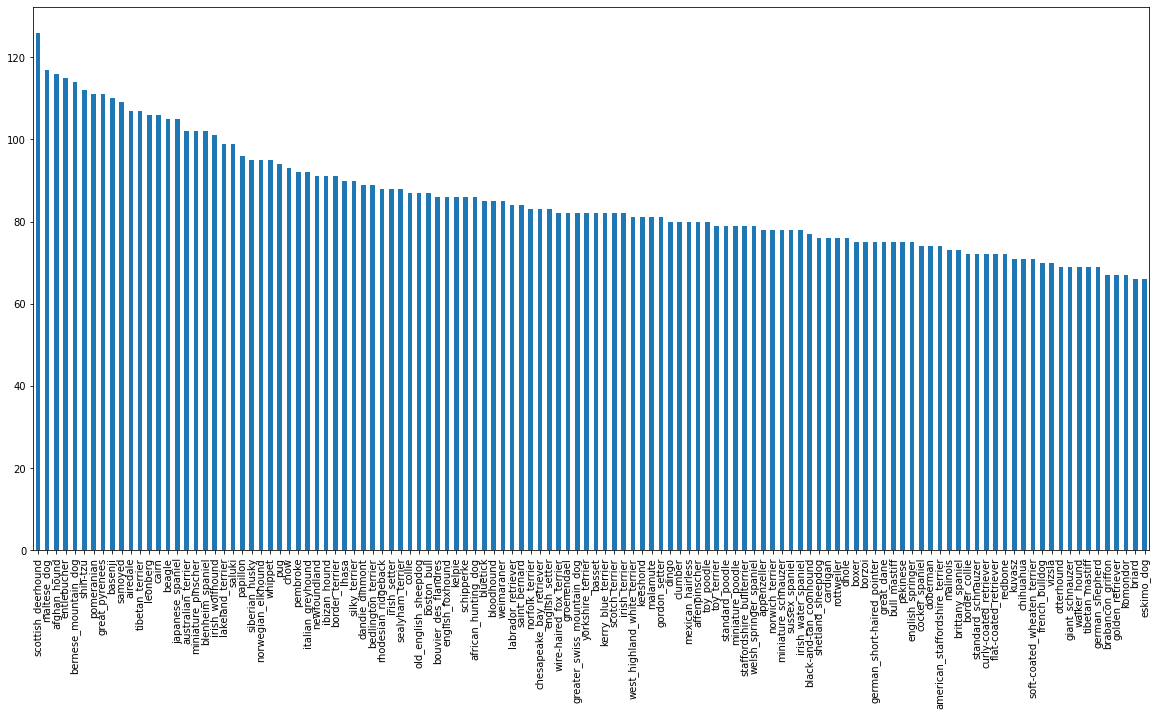

In [11]:
#how many images are for a breed

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [12]:
labels_csv["breed"].value_counts().median()

82.0